In [8]:
import pandas as pd 

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
apt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 156 to 10212
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ACC_YEAR        5269 non-null   int64         
 1   SGG_CD          5269 non-null   int64         
 2   SGG_NM          5269 non-null   object        
 3   BJDONG_CD       5269 non-null   int64         
 4   BJDONG_NM       5269 non-null   object        
 5   LAND_GBN        5269 non-null   float64       
 6   LAND_GBN_NM     5269 non-null   object        
 7   BONBEON         5269 non-null   float64       
 8   BUBEON          5269 non-null   float64       
 9   BLDG_NM         5269 non-null   object        
 10  DEAL_YMD        5269 non-null   datetime64[ns]
 11  OBJ_AMT         5269 non-null   int64         
 12  BLDG_AREA       5269 non-null   float64       
 13  TOT_AREA        5269 non-null   float64       
 14  FLOOR           5269 non-null   float64       
 15  R

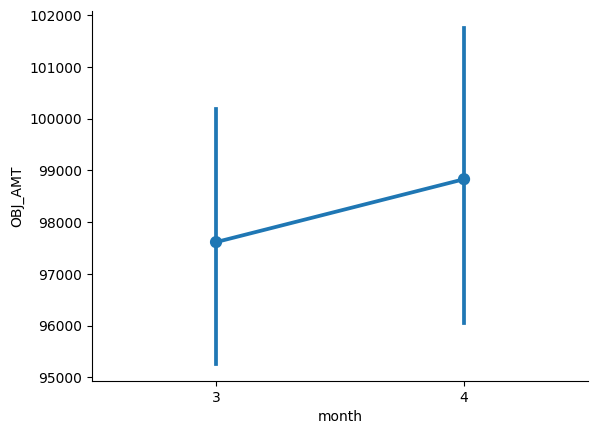

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
sns.pointplot(x = 'month', y = 'OBJ_AMT', data = apt_df)
sns.despine()

plt.savefig('output/stat01.png', dpi=200)
plt.show()

In [25]:
from pingouin import ttest
import pandas as pd 

seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]

march_df = apt_df[apt_df['month'] == 3]
april_df = apt_df[apt_df['month'] == 4]

ttest(march_df['OBJ_AMT'], april_df['OBJ_AMT'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.618972,4950.212078,two-sided,0.535963,"[-5067.79, 2635.6]",0.017076,0.038,0.093825


In [12]:
ttest_df = round(apt_df.groupby('month')['OBJ_AMT'].agg(["mean", "std", "size"]), 1)
ttest_df

,mean,std,size
month,,,
3,97613.7,73359.7,3059
4,98829.8,68137.7,2210


In [15]:
import numpy as np 
73359 / np.sqrt(3059)

1326.3668655812392

In [18]:
68137 / np.sqrt(2210)

1449.3953754233667

In [20]:
73359 - 68137 

5222

In [26]:
import numpy as np
(97613 - 98829) / np.sqrt((((3059-1) * 73359**2 + (2210-1)*68137**2)/(3059+2210-2))*((1/3059) + (1/2210)))

-0.6116187198938243